In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 100

## Summary Statistics

### Mean and Median

In [2]:
import numpy as np

n = 42
x = np.random.normal(size=n)
x_mean = np.sum(x) / n
if n % 2 == 1:  # odd
    x_med = np.sort(x)[(n + 1) // 2 - 1]
else:  # even
    x_med = 0.5 * (np.sort(x)[n // 2 - 1] + np.sort(x)[n // 2])

print(f'Mean: {x_mean:.3f} ({np.mean(x):.3f})')
print(f'Median: {x_med:.3f} ({np.median(x):.3f})')

Mean: -0.340 (-0.340)
Median: -0.310 (-0.310)


### Variance and Standard Deviation

Variance: 1.050 (1.050)
Standard Devation: 1.025 (1.025)


Text(0.5, 1.0, 'Different Variances')

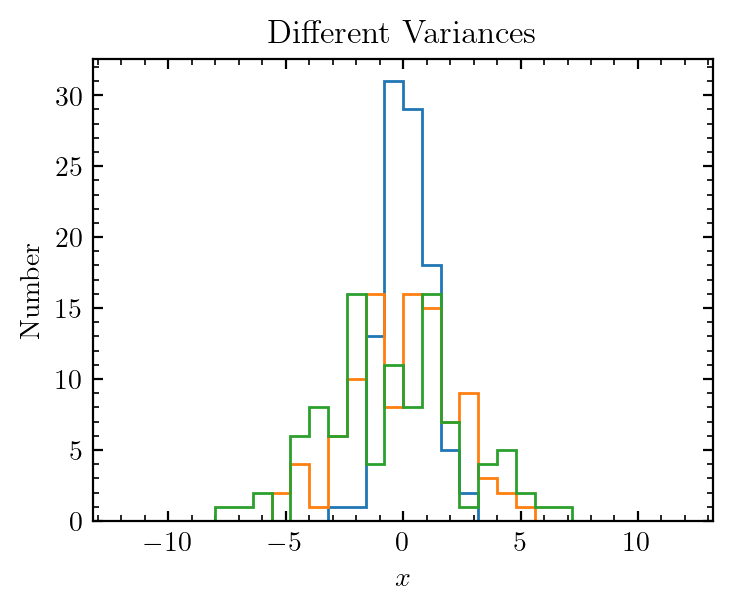

In [3]:
import numpy as np

n = 42
x = np.random.normal(size=n)
x_mean = np.sum(x) / n
x_var = np.sum((x - x_mean)**2) / (n - 1)

print(f'Variance: {x_var:.3f} ({np.var(x, ddof=1):.3f})')
print(f'Standard Devation: {np.sqrt(x_var):.3f} ({np.std(x, ddof=1):.3f})')

for std in [1, 2, 3]:
    x = np.random.normal(scale=std, size=100)
    plt.hist(x, bins=np.linspace(-12, +12, 31), histtype='step')
plt.xlabel('$x$')
plt.ylabel('Number')
plt.title('Different Variances')

### Correlation Coefficient

Correlation Coefficient: 0.784 (0.784)


Text(0.5, 1.0, 'Different Correlations')

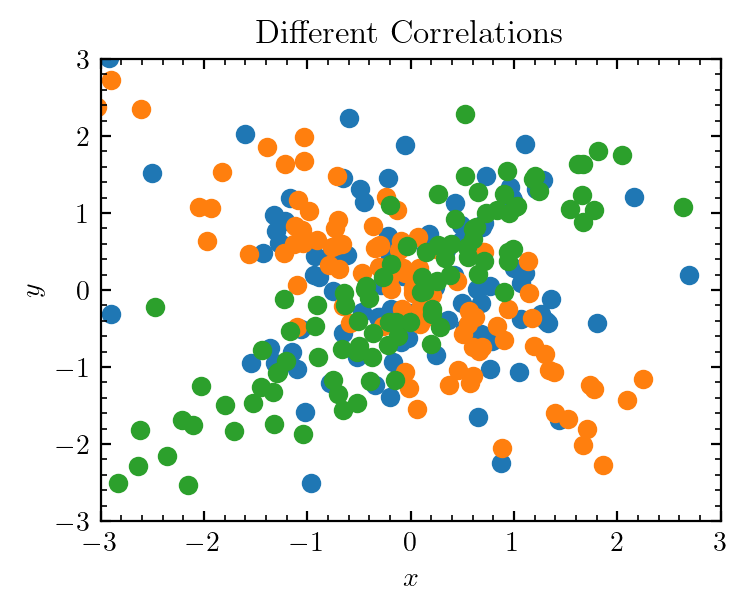

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

n = 42
xy = np.random.multivariate_normal([0, 0], [[1.0, 0.75], [0.75, 1.0]], size=n)
x = xy[:, 0]
y = xy[:, 1]
r = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (n - 1) / np.std(x, ddof=1) / np.std(y, ddof=1)

print(f'Correlation Coefficient: {r:.3f} ({pearsonr(x, y).statistic:.3f})')

for rho in [0, -0.8, 0.8]:
    xy = np.random.multivariate_normal([0, 0], [[1.0, rho], [rho, 1.0]], size=100)
    plt.scatter(*xy.T)
plt.xlim(-3, +3)
plt.ylim(-3, +3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Different Correlations')

## Estimators

Text(0.5, 1.0, 'Distribution of Mean of 10 Samples')

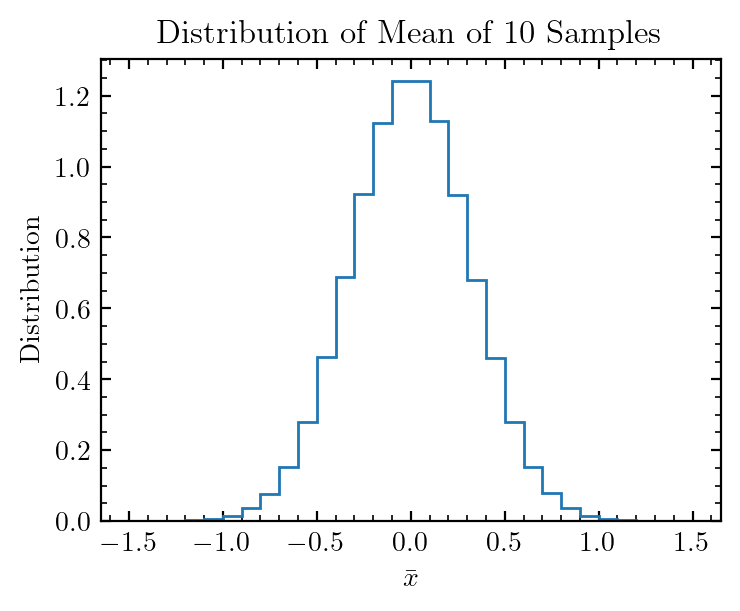

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x_mean = [np.mean(np.random.normal(size=10)) for i in range(10**6)]
plt.hist(x_mean, bins=np.linspace(-1.5, 1.5, 31), histtype='step', density=True)
plt.xlabel(r'$\bar x$')
plt.ylabel(r'Distribution')
plt.title('Distribution of Mean of 10 Samples')

## Hypothesis Testing

Text(0.5, 1.0, 'Are $x$ and $y$ correlated?')

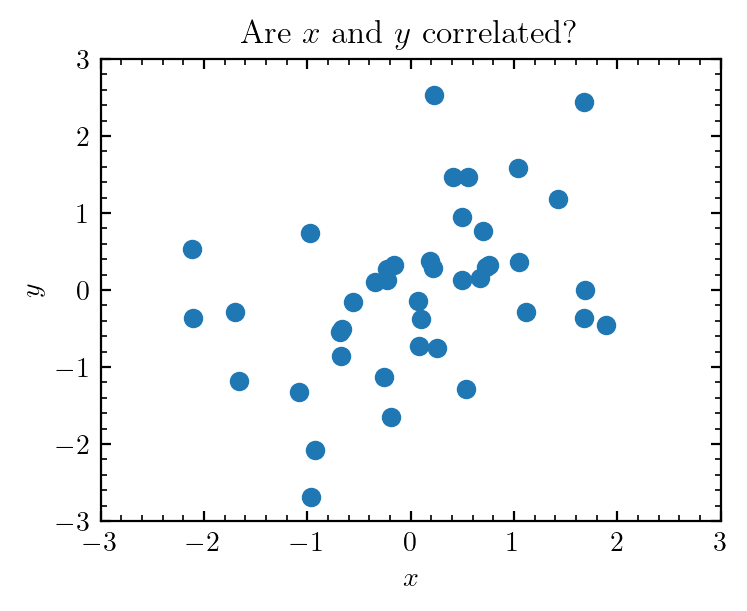

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

np.random.seed(0)
n = 42
xy = np.random.multivariate_normal([0, 0], [[1.0, 0.3], [0.3, 1.0]], size=n)

plt.scatter(*xy.T)
plt.xlim(-3, +3)
plt.ylim(-3, +3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Are $x$ and $y$ correlated?')

Text(0.5, 1.0, 'Hypothesis Testing')

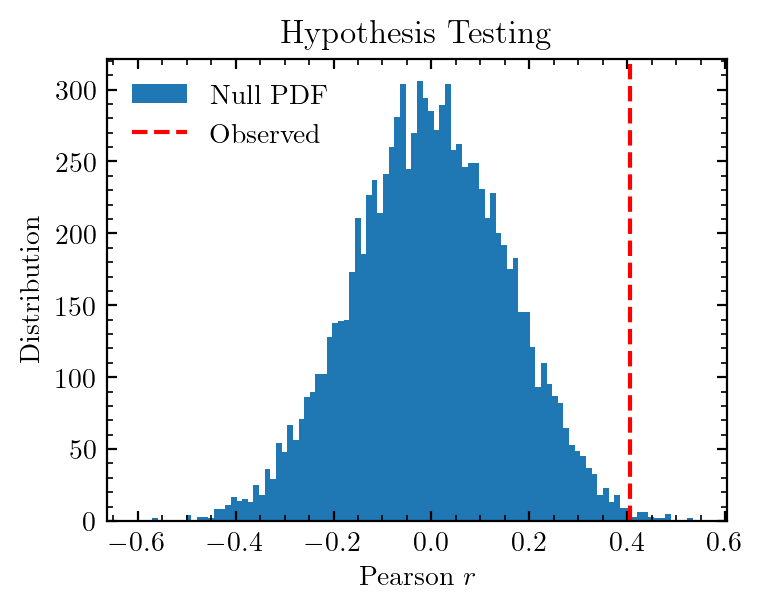

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

np.random.seed(0)
n = 42
xy = np.random.multivariate_normal([0, 0], [[1.0, 0.3], [0.3, 1.0]], size=n)
r_obs = pearsonr(*xy.T).statistic

r = []
n = 42
for i in range(10**4):
    x = np.random.normal(size=n)
    y = np.random.normal(size=n)
    r.append(pearsonr(x, y).statistic)

plt.hist(r, bins=100, label='Null PDF')
plt.axvline(r_obs, color='red', ls='--', label='Observed')
plt.legend(loc='best', frameon=False)
plt.xlabel(r'Pearson $r$')
plt.ylabel(r'Distribution')
plt.title('Hypothesis Testing')

In [8]:
p = np.mean(np.abs(r) >= r_obs)
print(f'p-value: {p:.4f} ({pearsonr(*xy.T).pvalue:.4f})')

p-value: 0.0086 (0.0077)


## Exercise 1: Estimators

In this exercise, we will compare different estimators of the mean of a normal distribution.

(a) Compare the distribution of the mean, median, and $0.5 ( \mathrm{min}(x_n) + \mathrm{max}(x_n))$ of $n = 10$ random samples from a normal distribution with mean $0$ and unity variance (`np.random.normal(size=10)`). Which estimator is the "best" and why? Compare them in terms of bias and variance.

(b) Repeat exercise (a) for $n=100$ and $n=1000$. Do the results indicate that the estimators are consistent?

(c) Repeat exercise (a) but with $X$ drawn from a uniform distribution in the range $[-0.5, +0.5]$ (`np.random.uniform(-0.5, 0.5, size=10)`). Which estimator is the best?

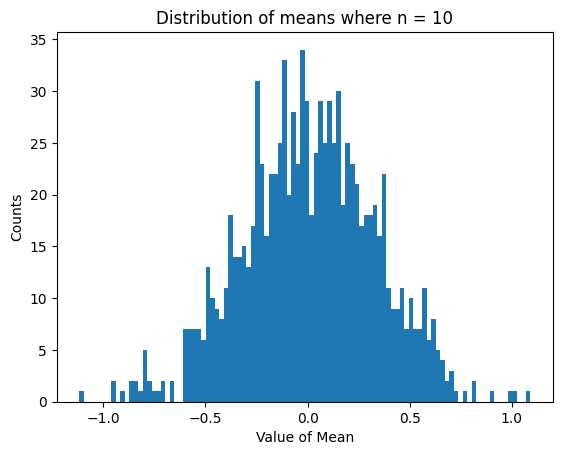

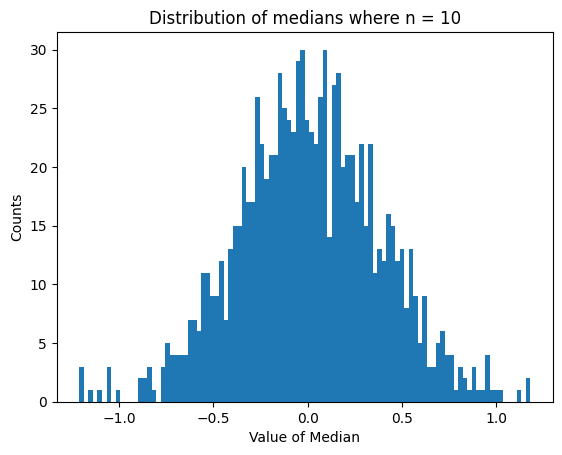

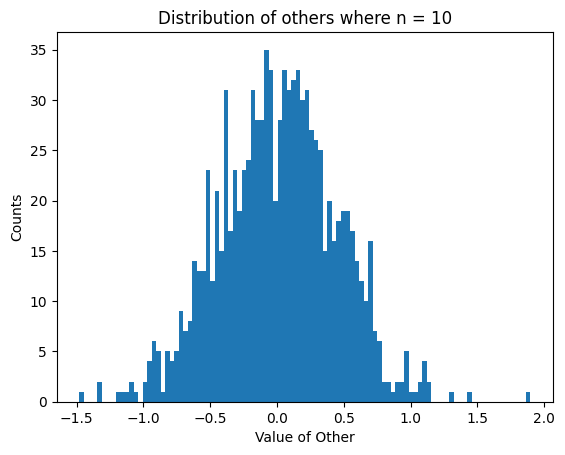

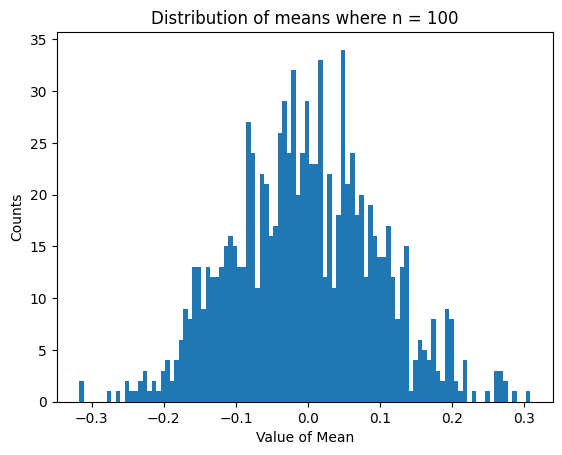

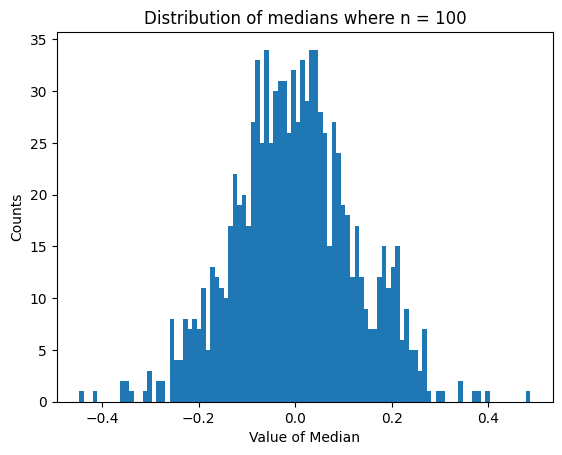

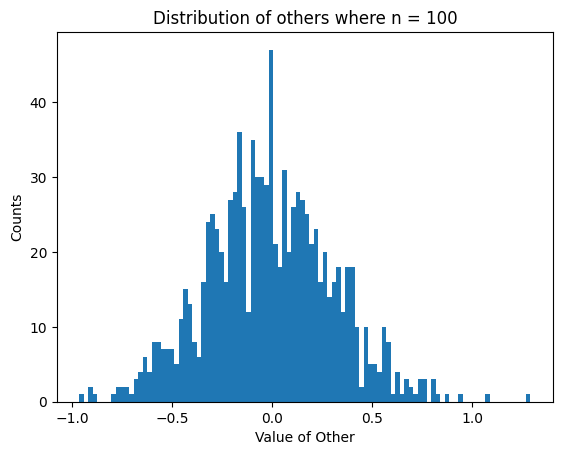

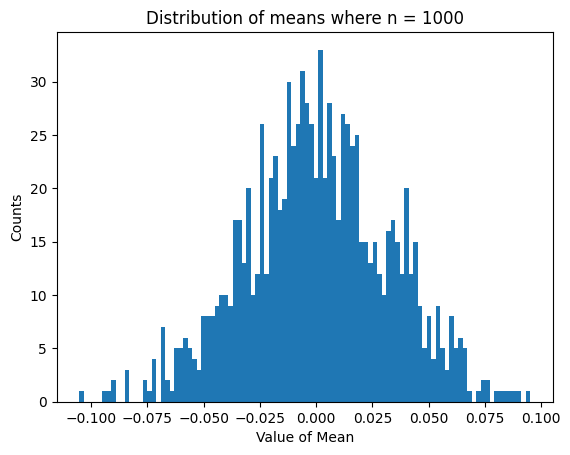

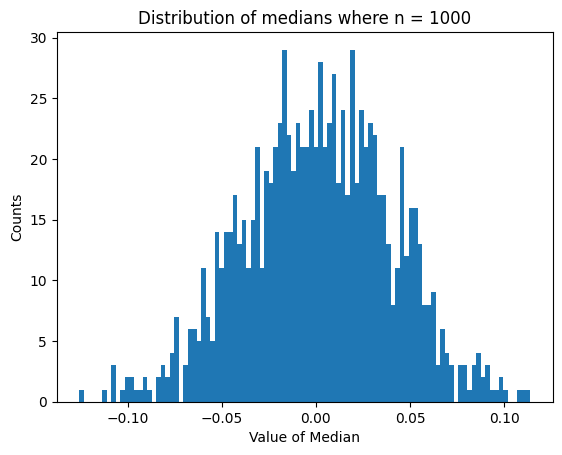

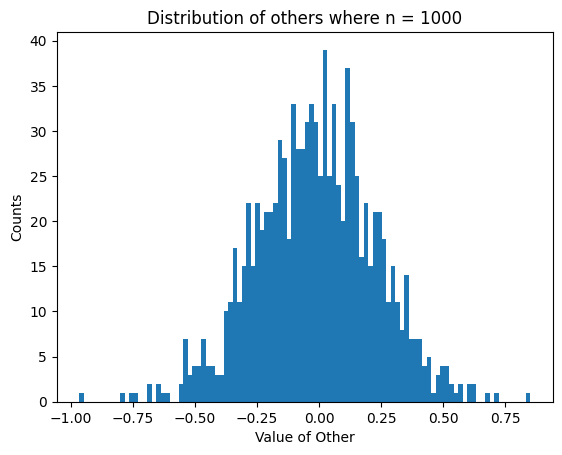

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# return mean, median, other
def get_estimators(sample_size):
    true_mean = 0
    sample = np.random.normal(loc = true_mean, size = sample_size)
    return np.mean(sample), np.median(sample), 0.5 * (min(sample) + max(sample))

def plot_estimators(sample_size):
    mean_list = []
    median_list = []
    other_list = []

    for x in range(1000):
        mean, median, other = get_estimators(sample_size)
        mean_list.append(mean)
        median_list.append(median)
        other_list.append(other)

    plt.hist(mean_list, bins=100, label='Mean')
    plt.title(f'Distribution of means where n = {sample_size}')
    plt.xlabel('Value of Mean')
    plt.ylabel('Counts')
    plt.show()

    plt.hist(median_list, bins=100, label='Median')
    plt.title(f'Distribution of medians where n = {sample_size}')
    plt.xlabel('Value of Median')
    plt.ylabel('Counts')
    plt.show()

    plt.hist(other_list, bins=100, label='Other')
    plt.title(f'Distribution of others where n = {sample_size}')
    plt.xlabel('Value of Other')
    plt.ylabel('Counts')
    plt.show()


plot_estimators(10)
plot_estimators(100)
plot_estimators(1000)

For this distribution, mean or median are the best estimators to use because they are both accurate with low variation. The median is a better estimator for distributions with outliers, but a normal distribution--especially at higher sample sizes--will have few to no outliers.

## Exercise 2: Hypothesis Testing

For this exercise, we want to determine whether the $x$ and $y$ values in the file `Class_4_Exercise_2.csv` are correlated.

(a) Compute the Pearson correlation coefficient for the data and its associated $p$-value. The null hypothesis assumed by `scipy.stats.pearsonr` is that all values are independent of each other and that all $x$ values are drawn from a single Gaussian distribution and all $y$ values drawn from a single Gaussian distribution. What does this test indicate?

(b) Repeat the test using the Spearman correlation coefficient. The Spearman correlation coefficient is defined as the Pearson correlation coefficient of the ranks of $x$ and $y$. The rank of a sequence of numbers replaces each individual number by their rank when the data is sorted. For example, the ranks of [0.5, 1.4, 0.2, 2.5] is [2, 3, 1, 4]. First, verify that `scipy.stats.spearmanr` returns the expected statistic, i.e., compare the output of `spearmanr` against that of `pearsonr` applied to the ranks (`scipy.stats.rankdata`).

(c) The null hypothesis assumed by `spearmanr` is that the $x$ and $y$ values are independent and drawn from continous distributions. Check that the reported $p$-value agrees with numerical experiments. What does the Spearman correlation coefficient indicate?

(d) Based on the tests you performed in (a) and (c), and the assumptions each test makes, would you conclude that there is correlation between $X$ and $Y$? Explain your reasoning.

In [ ]:
import pandas as pd
import scipy.stats as stats

data = pd.read_csv("Class_4_Exercise_2.csv")
x_list = data['x']
y_list = data['y']

stats.pearsonr(x_list, y_list).pvalue